1. remove any athlete that hasnt completed all workouts
2. metric height weight
3. merge open and qf
4. use this dataset for analysis


In [1]:
import numpy as np
import pandas as pd

male_open_data = pd.read_csv('./maleAthletesOpen2.csv')
male_qf_data = pd.read_csv('./maleAthletesqf.csv')
male_open_data.head(5)

,id,openrank,name,gender,country,region,age,weight,height,22.1Score,22.1Rank,22.2Score,22.2Rank,22.3Score,22.3Rank
0,310970,1,Saxon Panchik,M,United States,North America,26,180 lb,69 in,380 reps,3,7:47,13,4:30,9
1,1454081,2,Matt Poulin,M,United States,North America,26,195 lb,70 in,364 reps,10,7:37,7,4:31,11
2,811708,3,Justin Medeiros,M,United States,North America,23,190 lb,68 in,372 reps,5,7:53,19,4:29,7
3,676693,4,Colten Mertens,M,United States,North America,24,185 lb,64 in,361 reps,23,7:39,8,4:24,4
4,879211,5,Phil Toon,M,United States,North America,24,195 lb,70 in,363 reps,11,7:33,4,4:44,23


In [2]:
clean_qf_data = male_qf_data.dropna(subset=['QFOneScore', 'QFTwoScore', 'QFThreeScore', 'QFFourScore', 'QFFiveScore'])

In [3]:
merge_result = male_open_data.merge(clean_qf_data, how="inner", on=['id'], suffixes=('', '_delme'))

In [4]:
merge_result.head(5)

,id,openrank,name,gender,country,region,age,weight,height,22.1Score,...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore,QFFourRank,QFFiveScore,QFFiveRank
0,310970,1,Saxon Panchik,M,United States,North America,26,180 lb,69 in,380 reps,...,6:14,6,7:28,26,13:33,29,1019 lbs,191,2:48,54
1,1454081,2,Matt Poulin,M,United States,North America,26,195 lb,70 in,364 reps,...,7:01,49,8:04,102,13:33,29,926 lbs,1027,3:16,386
2,811708,3,Justin Medeiros,M,United States,North America,23,190 lb,68 in,372 reps,...,6:21,8,6:56,2,13:27,19,1047 lbs,77,2:44,30
3,676693,4,Colten Mertens,M,United States,North America,24,185 lb,64 in,361 reps,...,6:52,37,8:20,146,15:38,862,1082 lbs,30,3:00,163
4,879211,5,Phil Toon,M,United States,North America,24,195 lb,70 in,363 reps,...,6:58,45,7:59,91,14:36,274,1063 lbs,50,2:46,38


In [5]:
# Discard the columns that acquired a suffix
merge_result = merge_result[[c for c in merge_result.columns if not c.endswith('_delme')]]

In [6]:
merge_result['22.1Score']

0       380 reps
1       364 reps
2       372 reps
3       361 reps
4       363 reps
          ...   
3299    270 reps
3300    271 reps
3301    271 reps
3302    270 reps
3303    270 reps
Name: 22.1Score, Length: 3304, dtype: object

In [7]:
merge_result['22.1Score'] = merge_result['22.1Score'].str.extract(r'(\d+)', expand=False)

In [8]:
merge_result['QFFourScore'] = merge_result['QFFourScore'].str.extract(r'(\d+)', expand=False)

In [9]:
merge_result['QFFourScore'] = pd.to_numeric(merge_result['QFFourScore'])
merge_result['QFFourScore'].dtype

dtype('int64')

In [10]:
merge_result['22.1Score'] = pd.to_numeric(merge_result['22.1Score'])
merge_result['22.1Score'].dtype

dtype('int64')

In [11]:
# split column into multiple columns by delimiter 
temp_df = merge_result['weight'].str.split(' ', expand=True)
vals = {'lb':0.453592, 'kg':1}
temp_df.iloc[:, 0] = pd.to_numeric(temp_df.iloc[:, 0])
temp_df

,0,1
0,180.0,lb
1,195.0,lb
2,190.0,lb
3,185.0,lb
4,195.0,lb
...,...,...
3299,NaN,NaN
3300,NaN,NaN
3301,93.0,kg
3302,84.0,kg


In [12]:
temp_df['new'] = round(temp_df.iloc[:, 0]*temp_df.iloc[:, -1].map(vals))
temp_df['new']

0       82.0
1       88.0
2       86.0
3       84.0
4       88.0
        ... 
3299     NaN
3300     NaN
3301    93.0
3302    84.0
3303    82.0
Name: new, Length: 3304, dtype: float64

In [13]:
merge_result['weight'] = temp_df['new']
merge_result

,id,openrank,name,gender,country,region,age,weight,height,22.1Score,...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore,QFFourRank,QFFiveScore,QFFiveRank
0,310970,1,Saxon Panchik,M,United States,North America,26,82.0,69 in,380,...,6:14,6,7:28,26,13:33,29,1019,191,2:48,54
1,1454081,2,Matt Poulin,M,United States,North America,26,88.0,70 in,364,...,7:01,49,8:04,102,13:33,29,926,1027,3:16,386
2,811708,3,Justin Medeiros,M,United States,North America,23,86.0,68 in,372,...,6:21,8,6:56,2,13:27,19,1047,77,2:44,30
3,676693,4,Colten Mertens,M,United States,North America,24,84.0,64 in,361,...,6:52,37,8:20,146,15:38,862,1082,30,3:00,163
4,879211,5,Phil Toon,M,United States,North America,24,88.0,70 in,363,...,6:58,45,7:59,91,14:36,274,1063,50,2:46,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1287485,7281,Ricky Figueroa,M,United States,North America,30,NaN,NaN,270,...,12:37,2468,186 reps,5673,20:12,5145,810,3463,6:53,4315
3300,1895809,7287,Samuel Pickavance,M,United Kingdom,Europe,28,NaN,NaN,271,...,14:26,3657,201 reps,5223,18:26,3691,800,3727,54 reps,5136
3301,393831,7293,Johannes Lagesson,M,Sweden,Europe,31,93.0,193 cm,271,...,170 reps,4992,14:16,3695,15:55,1108,756,4753,4:04,1446
3302,1397921,7296,Bastien Dura,M,France,Europe,29,84.0,178 cm,270,...,174 reps,4520,155 reps,5981,207 reps,6351,749,4938,5:53,3524


In [14]:
# split column into multiple columns by delimiter 
temp_df2 = merge_result['height'].str.split(' ', expand=True)
vals2 = {'in':2.54, 'cm':1}
temp_df2.iloc[:, 0] = pd.to_numeric(temp_df2.iloc[:, 0])
temp_df2

,0,1
0,69.0,in
1,70.0,in
2,68.0,in
3,64.0,in
4,70.0,in
...,...,...
3299,NaN,NaN
3300,NaN,NaN
3301,193.0,cm
3302,178.0,cm


In [15]:
temp_df2['new'] = round(temp_df2.iloc[:, 0]*temp_df2.iloc[:, -1].map(vals2))
temp_df2['new']

0       175.0
1       178.0
2       173.0
3       163.0
4       178.0
        ...  
3299      NaN
3300      NaN
3301    193.0
3302    178.0
3303    175.0
Name: new, Length: 3304, dtype: float64

In [16]:
merge_result['height'] = temp_df2['new']

In [17]:
merge_result

,id,openrank,name,gender,country,region,age,weight,height,22.1Score,...,QFOneScore,QFOneRank,QFTwoScore,QFTwoRank,QFThreeScore,QFThreeRank,QFFourScore,QFFourRank,QFFiveScore,QFFiveRank
0,310970,1,Saxon Panchik,M,United States,North America,26,82.0,175.0,380,...,6:14,6,7:28,26,13:33,29,1019,191,2:48,54
1,1454081,2,Matt Poulin,M,United States,North America,26,88.0,178.0,364,...,7:01,49,8:04,102,13:33,29,926,1027,3:16,386
2,811708,3,Justin Medeiros,M,United States,North America,23,86.0,173.0,372,...,6:21,8,6:56,2,13:27,19,1047,77,2:44,30
3,676693,4,Colten Mertens,M,United States,North America,24,84.0,163.0,361,...,6:52,37,8:20,146,15:38,862,1082,30,3:00,163
4,879211,5,Phil Toon,M,United States,North America,24,88.0,178.0,363,...,6:58,45,7:59,91,14:36,274,1063,50,2:46,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,1287485,7281,Ricky Figueroa,M,United States,North America,30,NaN,NaN,270,...,12:37,2468,186 reps,5673,20:12,5145,810,3463,6:53,4315
3300,1895809,7287,Samuel Pickavance,M,United Kingdom,Europe,28,NaN,NaN,271,...,14:26,3657,201 reps,5223,18:26,3691,800,3727,54 reps,5136
3301,393831,7293,Johannes Lagesson,M,Sweden,Europe,31,93.0,193.0,271,...,170 reps,4992,14:16,3695,15:55,1108,756,4753,4:04,1446
3302,1397921,7296,Bastien Dura,M,France,Europe,29,84.0,178.0,270,...,174 reps,4520,155 reps,5981,207 reps,6351,749,4938,5:53,3524


In [18]:
medians = merge_result.median(axis=0)
medians

C:\Users\ejamcud\AppData\Local\Temp\ipykernel_16836\3864881461.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = merge_result.median(axis=0)


id             956953.5
openrank         3220.0
age                28.0
weight             85.0
height            178.0
22.1Score         296.5
22.1Rank         3799.0
22.2Rank         3693.0
22.3Rank         3299.0
rank             1779.0
QFOneRank        2009.0
QFTwoRank        1949.0
QFThreeRank      2062.0
QFFourScore       862.5
QFFourRank       2253.5
QFFiveRank       2009.0
dtype: float64

In [19]:
merge_result['age'].value_counts()

28    301
29    280
30    273
27    267
31    265
25    259
26    251
32    240
24    209
33    190
23    144
34    139
22    130
21     93
35     57
20     56
19     35
37     27
36     24
18     22
38     14
39     12
40      7
42      3
17      1
44      1
49      1
43      1
45      1
41      1
Name: age, dtype: int64

<AxesSubplot:>

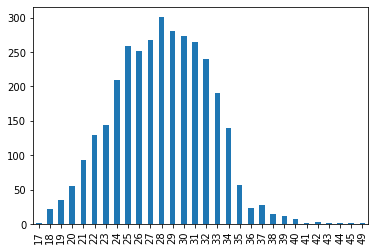

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

merge_result['age'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

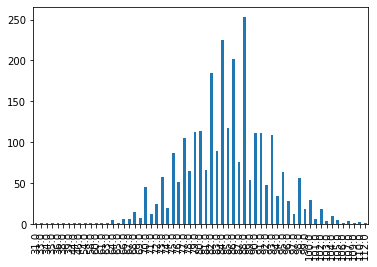

In [21]:
merge_result['weight'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

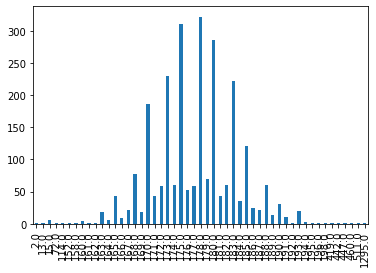

In [22]:
merge_result['height'].value_counts().sort_index().plot(kind='bar')

In [23]:
merge_result['weight'].value_counts()

88.0     253
84.0     225
86.0     202
82.0     185
85.0     117
        ... 
46.0       1
35.0       1
38.0       1
33.0       1
109.0      1
Name: weight, Length: 61, dtype: int64

In [24]:
merge_result['height'].value_counts()

178.0     322
175.0     311
180.0     286
173.0     230
183.0     222
170.0     186
185.0     121
168.0      77
179.0      70
174.0      61
182.0      60
188.0      60
177.0      59
172.0      59
176.0      52
171.0      44
181.0      43
165.0      43
184.0      35
190.0      31
186.0      25
167.0      22
187.0      22
193.0      20
169.0      19
163.0      18
189.0      14
191.0      11
166.0       9
15.0        6
164.0       6
160.0       4
194.0       3
152.0       2
447.0       2
2.0         2
198.0       2
196.0       2
192.0       2
195.0       2
442.0       1
72.0        1
460.0       1
161.0       1
114.0       1
1295.0      1
162.0       1
13.0        1
511.0       1
158.0       1
419.0       1
Name: height, dtype: int64

In [25]:
merge_result['height'].value_counts(dropna=False).sort_index()

2.0         2
13.0        1
15.0        6
72.0        1
114.0       1
152.0       2
158.0       1
160.0       4
161.0       1
162.0       1
163.0      18
164.0       6
165.0      43
166.0       9
167.0      22
168.0      77
169.0      19
170.0     186
171.0      44
172.0      59
173.0     230
174.0      61
175.0     311
176.0      52
177.0      59
178.0     322
179.0      70
180.0     286
181.0      43
182.0      60
183.0     222
184.0      35
185.0     121
186.0      25
187.0      22
188.0      60
189.0      14
190.0      31
191.0      11
192.0       2
193.0      20
194.0       3
195.0       2
196.0       2
198.0       2
419.0       1
442.0       1
447.0       2
460.0       1
511.0       1
1295.0      1
NaN       728
Name: height, dtype: int64

In [33]:
print(merge_result['weight'].value_counts(dropna=False).sort_index())

31.0       1
33.0       1
34.0       1
35.0       1
36.0       2
        ... 
107.0      4
109.0      1
110.0      3
112.0      1
NaN      603
Name: weight, Length: 62, dtype: int64


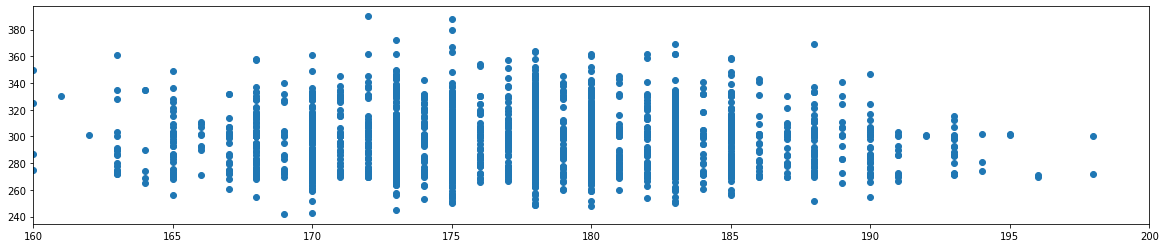

In [32]:
plt.figure().set_figwidth(20)
plt.scatter(merge_result['height'], merge_result['22.1Score'])
plt.xlim([160, 200])
plt.show()

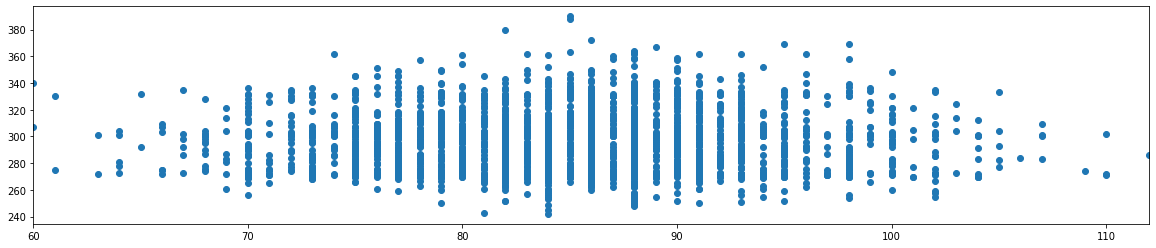

In [34]:
plt.figure().set_figwidth(20)
plt.scatter(merge_result['weight'], merge_result['22.1Score'])
plt.xlim([60, 112])
plt.show()

look at heatmap for open workout results vs qf ranking

<AxesSubplot:>

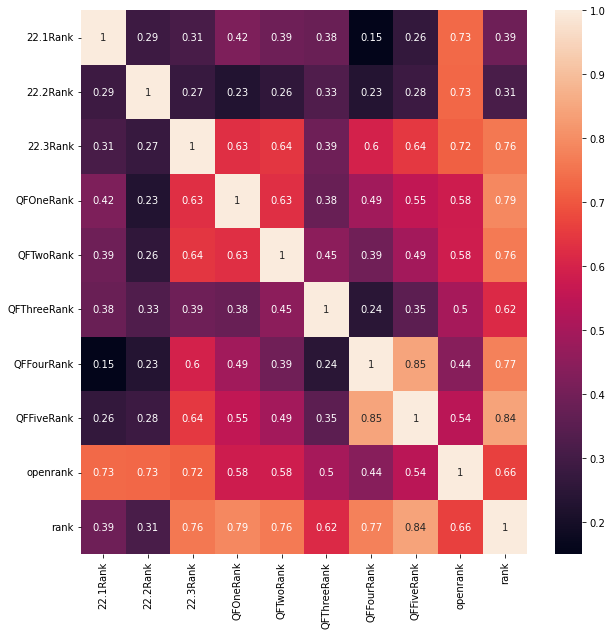

In [31]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(abs(merge_result[['22.1Rank', '22.2Rank', '22.3Rank', 'QFOneRank', 'QFTwoRank', 'QFThreeRank', 'QFFourRank', 'QFFiveRank', 'openrank', 'rank']].dropna().corr()), annot=True, ax=ax)

this shows

In [30]:
merge_result.to_csv('merged-males.csv', index=False)